# Lexicon-Based Sentiment Analysis of Android App Reviews: Analyzing Content Sentiment

Lexicon-based sentiment analysis is like using a special dictionary to figure out if a piece of writing is positive, negative, or neutral. You look up each word in the dictionary, see if it's labeled as positive, negative, or neutral, and then add up all the labels to determine the overall sentiment of the text. It's a straightforward way to understand the feelings expressed in a piece of writing.

## Project Workflow

### 1.Data Preprocessing

1.1: Lowercasing: Convert text to lowercase to standardize.

1.2: Remove Links: Eliminate hyperlinks or URLs from the text data.

1.3: Remove New Lines: Replace newline characters with spaces for consistent formatting.

1.4: Remove Words Containing Numbers: Filter out words containing digits as they may not convey meaningful sentiment.

1.5: Remove Extra Spaces: Trim excessive spaces between words.

1.6: Remove Special Characters: Eliminate non-alphanumeric characters.

1.7: Removal of Stop Words: Exclude common stop words like "the," "is," and "and."

1.8: Stemming: Reduce words to their root form using stemming.

1.9: Lemmatization: Convert words to their base or dictionary form through lemmatization.


## 2.Sentiment Analysis

2.1: Importing Necessary Libraries.

2.2: Initialize VADER Sentiment Analyzer.

2.3: Define a Function to Get the Sentiment Score Using VADER.

2.4: Apply Sentiment Analysis to Your 'content' Column and Create a New Column for Sentiment Score.

2.5: Define a Function to Classify Sentiments Based on the Score

2.6:  Apply Sentiment Classification and Create a New Column for Sentiment

2.7: Result

## 1.Data PreProcessing:

### Importing all necessary libraries

In this below code:

•We import pandas for handling data in DataFrame.

•We import re for using regular expressions to remove special characters and links.

•We import nltk (Natural Language Toolkit) for text processing tasks.

•From nltk.corpus, we import stopwords to remove common stop words.

•From nltk.tokenize, we import word_tokenize for tokenizing the text.

•From nltk.stem, we import PorterStemmer for stemming and WordNetLemmatizer for lemmatization.

In [4]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

### Let's import the dataset and print the first few rows to ensure it's loaded correctly:

In [5]:
# Importing the dataset
df = pd.read_csv("reviews.csv")

# Print the first few rows of the dataset
print(df.head())

                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app u

### Let's proceed with the preprocessing steps

These preprocessing steps are common techniques used to clean and prepare text data for natural language processing tasks like sentiment analysis, text classification, or topic modeling. 

In [16]:
# 1.1: Lowercasing: Convert text to lowercase to standardize
df['cleaned_review'] = df['content'].str.lower()

# 1.2: Remove Links: Eliminate hyperlinks or URLs from the text data
df['cleaned_review'] = df['content'].astype(str).apply(lambda x: re.sub(r'http\S+', '', x))

# 1.3: Remove New Lines: Replace newline characters with spaces for consistent formatting
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.replace('\n', ' '))

# 1.4: Remove Words Containing Numbers: Filter out words containing digits as they may not convey meaningful sentiment
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if not any(c.isdigit() for c in word)]))

# 1.5: Remove Extra Spaces: Trim excessive spaces between words
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join(x.split()))

# 1.6: Remove Special Characters: Eliminate non-alphanumeric characters
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# 1.7: Removal of Stop Words: Exclude common stop words like "the," "is," and "and"
stop_words = set(stopwords.words('english'))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# 1.8: Stemming: Reduce words to their root form using stemming
stemmer = PorterStemmer()
df['stemmed_review'] = df['cleaned_review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# 1.9: Lemmatization: Convert words to their base or dictionary form through lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized_review'] = df['cleaned_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

### The Result of Data Preprocessing:

In [17]:
# Print the DataFrame to see the results of data preprocessing
print("Original Content:\n", df['content'].head())
print("\nCleaned Review:\n", df['cleaned_review'].head())
print("\nStemmed Review:\n", df['stemmed_review'].head())
print("\nLemmatized Review:\n", df['lemmatized_review'].head())

Original Content:
 0    I have the same recurring tasks to do every da...
1    Instead of shopping around, I downloaded Any.d...
2    Why does every once in a while... out of the b...
3    Terrible Update! This app used to be perfect f...
4    This app is deceivingly terrible. There are so...
Name: content, dtype: object

Cleaned Review:
 0    recurring tasks every day need todolist remind...
1    Instead shopping around downloaded Anydo widel...
2    every blue app asks update acct emails everyth...
3    Terrible Update app used perfect planning cert...
4    app deceivingly terrible really nice design fe...
Name: cleaned_review, dtype: object

Stemmed Review:
 0    recur task everi day need todolist remind buzz...
1    instead shop around download anydo wide use se...
2    everi blue app ask updat acct email everyth ta...
3    terribl updat app use perfect plan certain tas...
4    app deceivingli terribl realli nice design fea...
Name: stemmed_review, dtype: object

Lemmatized Review:

# Word Cloud
The code defines a function to create and display word clouds for text data. It uses the WordCloud library to generate word clouds and matplotlib for plotting. The function takes a text column and a title as input, creates a word cloud from the text column, and plots it with the given title. Finally, it calls this function three times to create word clouds for three different processed text columns in the DataFrame. This visualization helps visualize the most common words in each processed text.

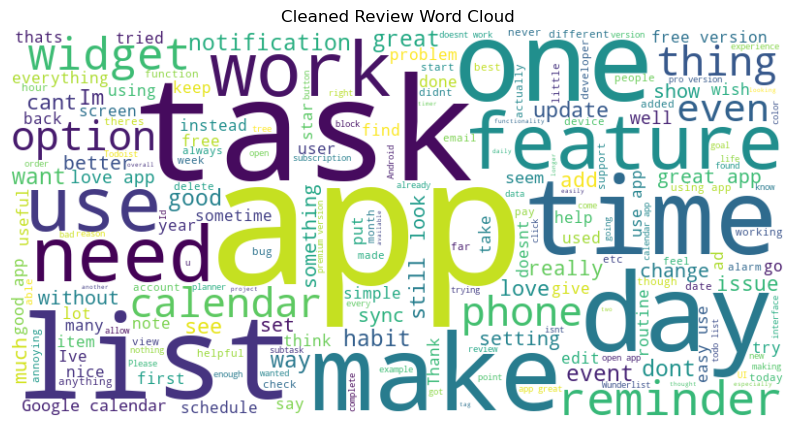

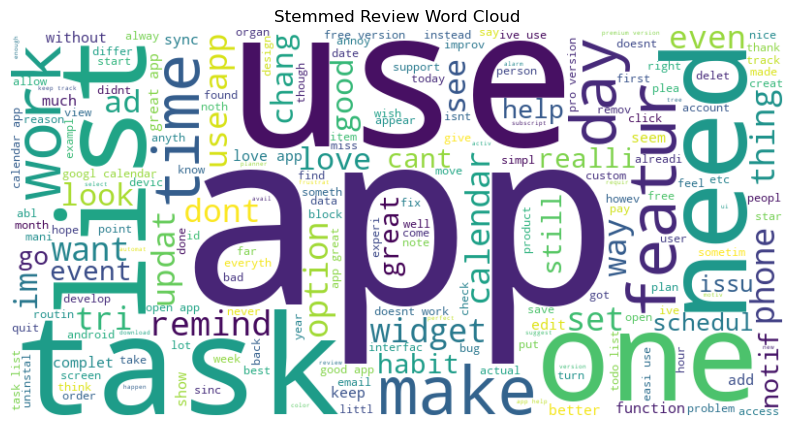

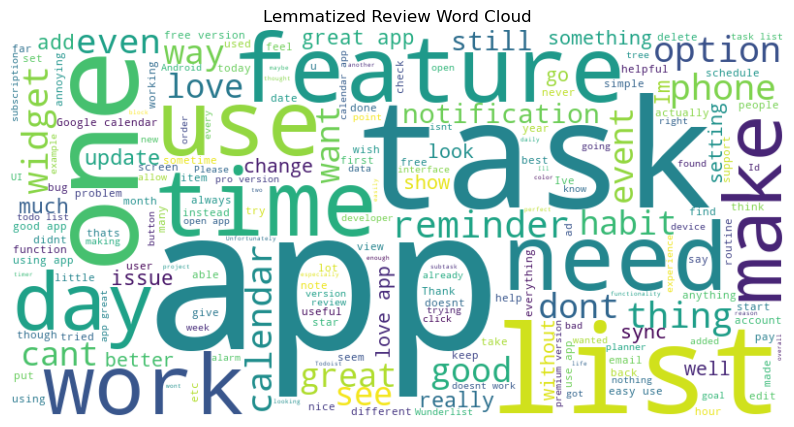

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word cloud
def generate_wordcloud(text_column, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_column))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and plot word clouds for each processed column
generate_wordcloud(df['cleaned_review'], 'Cleaned Review Word Cloud')
generate_wordcloud(df['stemmed_review'], 'Stemmed Review Word Cloud')
generate_wordcloud(df['lemmatized_review'], 'Lemmatized Review Word Cloud')

# Bar plot or Bar chart

This code calculates the average word count before and after each preprocessing stage (cleaning, stemming, and lemmatization) and visualizes the results using a bar plot. It helps in understanding how much text was modified during each preprocessing step by comparing the average word counts before and after.

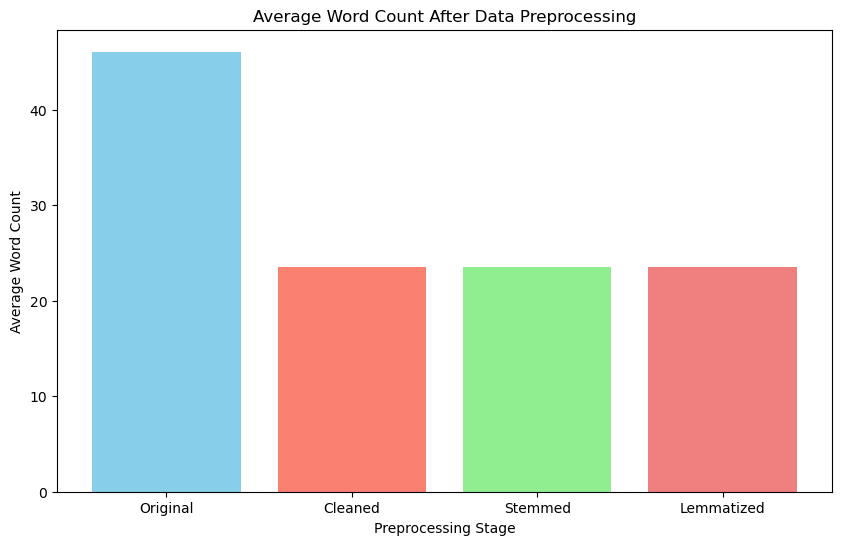

In [50]:
import numpy as np

# Calculate the number of words before and after preprocessing
original_word_count = df['content'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)
cleaned_word_count = df['cleaned_review'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)
stemmed_word_count = df['stemmed_review'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)
lemmatized_word_count = df['lemmatized_review'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

# Plotting the results
labels = ['Original', 'Cleaned', 'Stemmed', 'Lemmatized']
word_counts = [original_word_count.mean(), cleaned_word_count.mean(), stemmed_word_count.mean(), lemmatized_word_count.mean()]

plt.figure(figsize=(10, 6))
plt.bar(labels, word_counts, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title('Average Word Count After Data Preprocessing')
plt.xlabel('Preprocessing Stage')
plt.ylabel('Average Word Count')
plt.show()


# 2.Sentiment Analysis

### Let's import the necessary libraries for sentiment analysis:

In [32]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as s

### Initialize VADER Sentiment Analyzer

In [33]:
sid = SentimentIntensityAnalyzer()

### Define a Function to Get the Sentiment Score Using VADER

In [35]:
# Function to get sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

### Apply Sentiment Analysis to Your 'content' Column and Create a New Column for Sentiment Score

In [38]:
# Function to get sentiment score
def get_sentiment_score(text):
    # Check if the input is a string, if not, convert it to a string
    if isinstance(text, str):
        return sid.polarity_scores(text)['compound']
    else:
        return sid.polarity_scores(str(text))['compound']

### Define a Function to Classify Sentiments Based on the Score

In [39]:
# Function to classify sentiments based on the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

### Apply Sentiment Classification and Create a New Column for Sentimen

In [46]:
# Apply Sentiment Classification and Create a New Column for Sentiment
df['sentiment_score'] = df['content'].apply(get_sentiment_score)
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

### Result of Lexicon-Based Sentiment Analysis
visualizing the results of sentiment analysis can provide insights in a more appealing and intuitive way. One common way to visualize sentiment analysis results is by using bar plots to show the distribution of sentiments.

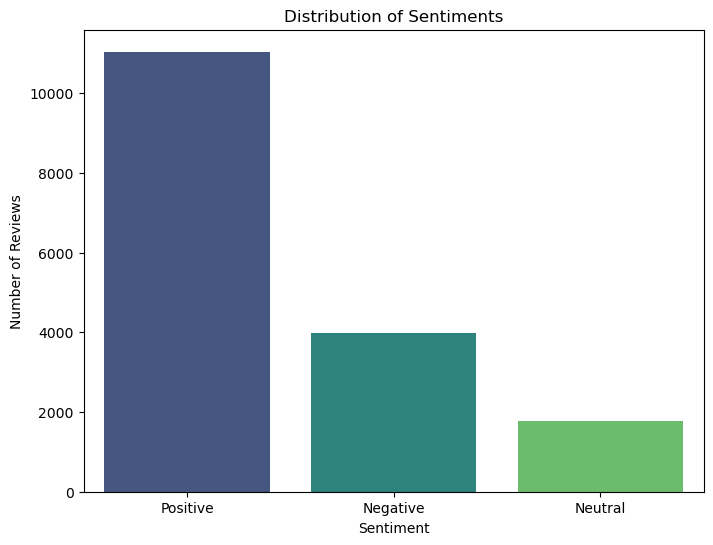

In [47]:
# Count the number of reviews for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [52]:
print(df[['content', 'sentiment_score', 'sentiment']].head())

                                             content  sentiment_score  \
0  I have the same recurring tasks to do every da...          -0.6792   
1  Instead of shopping around, I downloaded Any.d...          -0.2617   
2  Why does every once in a while... out of the b...          -0.8666   
3  Terrible Update! This app used to be perfect f...           0.7901   
4  This app is deceivingly terrible. There are so...           0.2853   

  sentiment  
0  Negative  
1  Negative  
2  Negative  
3  Positive  
4  Positive  
